- We will be using preprocessed file

 '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Preprocessed Data/eda_data_v0.1.csv'

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:

# For colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Preprocessed Data/eda_data_v0.1.csv'

In [4]:
west_df=pd.read_csv(file_path)

In [5]:
west_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91107 entries, 0 to 91106
Data columns (total 72 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url_present                           91107 non-null  int64  
 1   name                                          91107 non-null  object 
 2   description                                   91107 non-null  object 
 3   picture_url_present                           91107 non-null  int64  
 4   host_url_present                              91107 non-null  int64  
 5   host_name                                     91107 non-null  object 
 6   host_since                                    91107 non-null  object 
 7   host_response_time                            91107 non-null  object 
 8   host_response_rate                            91107 non-null  object 
 9   host_acceptance_rate                          91107 non-null 

In [6]:
## Also we will be dropping latitude and longitude
west_df.drop(columns=['latitude','longitude'],inplace=True)

## List of highly correlated features based on  EDA we performed earlier

['host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'year_round_occupancy_rate', 'month_round_occupancy_rate', 'revenue_per_rental', 'monthly_revenue_per_rental']

 - We are creating corr_feature list excluding latitude, longitude features

In [7]:
corr_feature=['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'year_round_occupancy_rate', 'month_round_occupancy_rate', 'revenue_per_rental', 'monthly_revenue_per_rental']

In [8]:
# Ensure corr_feature is a list of column names
selected_columns = corr_feature + ['host_is_superhost']


# Select the columns from west_df and display the first few rows
west_df[selected_columns].head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,year_round_occupancy_rate,month_round_occupancy_rate,revenue_per_rental,monthly_revenue_per_rental,host_is_superhost
0,1.0,4.0,2,1.0,1.0,1.0,257.0,30,30.0,30.0,...,5.00,5.00,1,1,0.03,100.000000,100.0,257.000000,257.0,Not Superhost
1,3.0,3.0,3,1.0,2.0,1.0,71.0,3,3.0,3.0,...,4.57,4.48,1,0,0.63,100.000000,100.0,71.000000,71.0,Superhost
2,2.0,3.0,3,1.0,1.0,1.0,132.0,3,1.0,3.0,...,4.93,4.73,2,1,0.57,97.260274,100.0,128.383562,132.0,Superhost
3,2.0,3.0,2,1.0,1.0,1.0,100.0,1,1.0,1.0,...,5.00,4.87,2,1,1.24,100.000000,100.0,100.000000,100.0,Superhost
4,1.0,2.0,4,1.0,1.0,2.0,189.5,30,30.0,30.0,...,5.00,4.89,1,1,0.34,100.000000,100.0,189.500000,189.5,Not Superhost


In [9]:
### we will create copy of west_df[selected_columns] and perform clustering model

df_selected = west_df[selected_columns].copy()

In [10]:
df_selected[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91107 entries, 0 to 91106
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   host_listings_count                          91107 non-null  float64
 1   host_total_listings_count                    91107 non-null  float64
 2   accommodates                                 91107 non-null  int64  
 3   bathrooms                                    91107 non-null  float64
 4   bedrooms                                     91107 non-null  float64
 5   beds                                         91107 non-null  float64
 6   price                                        91107 non-null  float64
 7   minimum_nights                               91107 non-null  int64  
 8   minimum_minimum_nights                       91107 non-null  float64
 9   maximum_minimum_nights                       91107 non-null  float64
 10

In [11]:
## We will perform binary encoding with host_is_superhost feature

df_selected = pd.get_dummies(df_selected, columns=['host_is_superhost'])

In [12]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91107 entries, 0 to 91106
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   host_listings_count                          91107 non-null  float64
 1   host_total_listings_count                    91107 non-null  float64
 2   accommodates                                 91107 non-null  int64  
 3   bathrooms                                    91107 non-null  float64
 4   bedrooms                                     91107 non-null  float64
 5   beds                                         91107 non-null  float64
 6   price                                        91107 non-null  float64
 7   minimum_nights                               91107 non-null  int64  
 8   minimum_minimum_nights                       91107 non-null  float64
 9   maximum_minimum_nights                       91107 non-null  float64
 10

In [13]:
# Convert the 'host_is_superhost_Not Superhost' column to 0 and 1
df_selected['host_is_superhost_Not Superhost'] = df_selected['host_is_superhost_Not Superhost'].astype(int)

# Convert the 'host_is_superhost_Superhost' column to 0 and 1
df_selected['host_is_superhost_Superhost'] = df_selected['host_is_superhost_Superhost'].astype(int)


In [14]:
df_selected.head()

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,reviews_per_month,year_round_occupancy_rate,month_round_occupancy_rate,revenue_per_rental,monthly_revenue_per_rental,host_is_superhost_Not Superhost,host_is_superhost_Superhost
0,1.0,4.0,2,1.0,1.0,1.0,257.0,30,30.0,30.0,...,5.00,1,1,0.03,100.000000,100.0,257.000000,257.0,1,0
1,3.0,3.0,3,1.0,2.0,1.0,71.0,3,3.0,3.0,...,4.48,1,0,0.63,100.000000,100.0,71.000000,71.0,0,1
2,2.0,3.0,3,1.0,1.0,1.0,132.0,3,1.0,3.0,...,4.73,2,1,0.57,97.260274,100.0,128.383562,132.0,0,1
3,2.0,3.0,2,1.0,1.0,1.0,100.0,1,1.0,1.0,...,4.87,2,1,1.24,100.000000,100.0,100.000000,100.0,0,1
4,1.0,2.0,4,1.0,1.0,2.0,189.5,30,30.0,30.0,...,4.89,1,1,0.34,100.000000,100.0,189.500000,189.5,1,0


 We will split the data into train and test . Then we will build clusters on train set and evaluate the model on test data.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [16]:
# feature with selected columns
features = df_selected.columns.tolist()

In [17]:
## We will perform train -test split before modeling

X = df_selected[features].drop(columns=['monthly_revenue_per_rental','revenue_per_rental'])
y = df_selected['monthly_revenue_per_rental']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check shapes
print(f"Train Shape: {X_train.shape}, Test Shape: {X_test.shape}")


Train Shape: (63774, 35), Test Shape: (27333, 35)


In [18]:
##Standardizing the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
# Save the scaler and features in a dictionary
scaler_data = {'scaler': scaler, 'features': features}
scaler_file = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/scaler.pkl'
joblib.dump(scaler_data, scaler_file)

print("Scaler and features saved successfully to scaler.pkl")

Scaler and features saved successfully to scaler.pkl


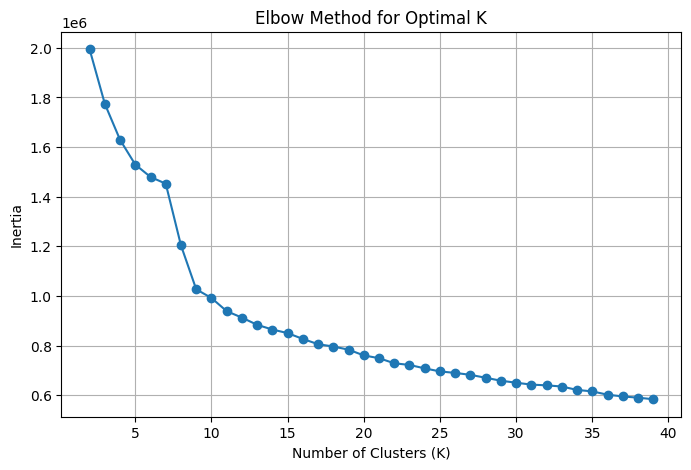

In [22]:
# Elbow method to find optimal K
inertia = []
k_values = range(2, 40)  # Try 2 to 40 clusters
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [24]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of K values to explore
k_values = range(2, 40)
silhouette_scores = []

best_k = None
best_silhouette_score = -1

# Iterate through different K values
for k in k_values:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=42)
    km.fit(X_train_scaled)

    # Calculate the average silhouette score
    silhouette_avg = silhouette_score(X_train_scaled, km.labels_)
    silhouette_scores.append(silhouette_avg)

    # Update the best K value if a higher silhouette score is found
    if silhouette_avg > best_silhouette_score:
        best_k = k
        best_silhouette_score = silhouette_avg

# Output the best K value and corresponding Silhouette Score
print("Best K value:", best_k)
print("Best Silhouette Score:", best_silhouette_score)

Best K value: 8
Best Silhouette Score: 0.21122062897044588


 - We are taking K=10 as from number of Clusters(K) =10 the curve stared to bend(saturation)

In [27]:
# Choose the number of clusters based on the elbow plot
optimal_k = 10  # Replace with the optimal value based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train_scaled)



KMeans(n_clusters=10, random_state=42)

 -  We will assign Clusters and Rank
         - Assign Clusters: Add cluster labels to the original data.
         - Rank Clusters: Rank clusters based on the mean of monthly_revenue_per_rental.

In [28]:
# Assign cluster labels to training and test data
train_labels = kmeans.predict(X_train_scaled)
test_labels = kmeans.predict(X_test_scaled)



In [29]:
# Evaluate the Silhouette Score on training data
silhouette_train = silhouette_score(X_train_scaled, train_labels)
print(f"Silhouette Score on Training Data: {silhouette_train}")


Silhouette Score on Training Data: 0.1540225267806847


In [31]:
# Combine training data with cluster labels
X_train_with_labels = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train_with_labels['cluster'] = train_labels
X_train_with_labels['monthly_revenue_per_rental'] = y_train.reset_index(drop=True)


In [33]:
# Assuming kmeans_2 and kmeans_4 are already fitted KMeans models
sse_k10 = kmeans.inertia_  #with K=10
#sse_k4 = kmeans_4.inertia_  # Replace kmeans_4 with the variable name for your KMeans model with K=4

# Print the SSE for K=10
print(f"When K=10, SSE = {sse_k10}")
#print(f"When K=4, SSE = {sse_k4}")

When K=10, SSE = 991601.0600577499


In [34]:
# Rank clusters by average revenue
cluster_revenue_ranking = (
    X_train_with_labels.groupby('cluster')['monthly_revenue_per_rental']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
cluster_revenue_ranking.columns = ['Cluster', 'Average Monthly Revenue']
print(cluster_revenue_ranking)


# Add a rank column to the ranking DataFrame
cluster_revenue_ranking['Rank'] = cluster_revenue_ranking['Average Monthly Revenue'].rank(
    method='dense', ascending=False
).astype(int)

print("Cluster Revenue Ranking:")
print(cluster_revenue_ranking)

   Cluster  Average Monthly Revenue
0        6               336.001204
1        3               182.525316
2        4               162.884541
3        2               155.866312
4        0               125.762403
5        9               102.291243
6        5                63.118452
7        8                61.949425
8        7                57.956413
9        1                32.901074
Cluster Revenue Ranking:
   Cluster  Average Monthly Revenue  Rank
0        6               336.001204     1
1        3               182.525316     2
2        4               162.884541     3
3        2               155.866312     4
4        0               125.762403     5
5        9               102.291243     6
6        5                63.118452     7
7        8                61.949425     8
8        7                57.956413     9
9        1                32.901074    10


In [40]:
# Add a rank column to the ranking DataFrame
cluster_revenue_ranking['Rank'] = cluster_revenue_ranking['Average Monthly Revenue'].rank(
    method='dense', ascending=False
).astype(int)

print("Cluster Revenue Ranking:")
print(cluster_revenue_ranking)

# Step 2: Map the rank back to the original dataset
rank_mapping = cluster_revenue_ranking.set_index('Cluster')['Rank'].to_dict()
X_train_with_labels['rank'] = X_train_with_labels['cluster'].map(rank_mapping)

# Verify the dataset with the new rank column
print(X_train_with_labels[['cluster', 'monthly_revenue_per_rental', 'rank']].head())

Cluster Revenue Ranking:
   Cluster  Average Monthly Revenue  Rank
0        6               336.001204     1
1        3               182.525316     2
2        4               162.884541     3
3        2               155.866312     4
4        0               125.762403     5
5        9               102.291243     6
6        5                63.118452     7
7        8                61.949425     8
8        7                57.956413     9
9        1                32.901074    10
   cluster  monthly_revenue_per_rental  rank
0        3                  216.000000     2
1        2                  292.900000     4
2        4                   73.100000     3
3        1                   15.333333    10
4        2                  227.000000     4


<ipython-input-41-03e4c38065f5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


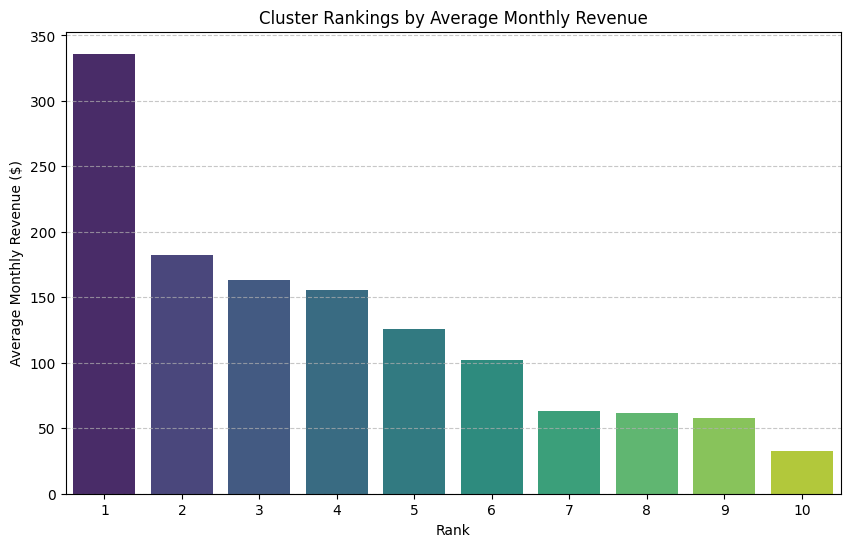

In [41]:
# Visualize cluster rankings
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Rank',
    y='Average Monthly Revenue',
    data=cluster_revenue_ranking,
    palette='viridis'
)
plt.title('Cluster Rankings by Average Monthly Revenue')
plt.xlabel('Rank')
plt.ylabel('Average Monthly Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


 ### Cluster Centroids as Feature Importance

In [42]:
# Get centroids of the clusters
centroids = kmeans.cluster_centers_

# Convert centroids to a DataFrame for better visualization
centroids_df = pd.DataFrame(centroids, columns=X.columns)

# Calculate feature importance based on variance across centroids
feature_importance = centroids_df.var().sort_values(ascending=False)

print("Feature Importance Based on Centroid Variance:")
print(feature_importance)

Feature Importance Based on Centroid Variance:
maximum_maximum_nights                         220.010377
maximum_nights_avg_ntm                         218.514818
minimum_maximum_nights                         174.474575
minimum_nights_avg_ntm                          17.949238
minimum_minimum_nights                          17.656751
minimum_nights                                  17.588445
maximum_minimum_nights                           7.601521
review_scores_rating                             4.391993
review_scores_accuracy                           4.297693
host_listings_count                              4.273314
review_scores_communication                      4.013011
review_scores_value                              3.833660
calculated_host_listings_count_entire_homes      3.589808
review_scores_checkin                            3.584518
calculated_host_listings_count                   3.293515
review_scores_cleanliness                        3.201941
host_total_listings_count

- Testing on unseen data and Model Evaluation
       
       - To test KMeans clustering model on the test data, we need to assign test data points to the nearest cluster centroids from the trained model.
       
       Since KMeans is unsupervised, the "testing" involves evaluating how well the clusters align with the test data's distribution or other metrics.

In [43]:
### Asigning CLuster to Test data

# Predict cluster labels for the test data
test_labels = kmeans.predict(X_test_scaled)

# Add the cluster labels to the test data
test_data_with_labels = pd.DataFrame(X_test_scaled, columns=X.columns)
test_data_with_labels['cluster'] = test_labels

# Add the monthly revenue column for evaluation
test_data_with_labels['monthly_revenue_per_rental'] = df_selected.loc[X_test.index, 'monthly_revenue_per_rental']


In [44]:
### Evaluating Clusters on test data

from sklearn.metrics import silhouette_score

# Compute silhouette score for the test set
silhouette_test = silhouette_score(X_test_scaled, test_labels)
print(f"Silhouette Score on Test Data: {silhouette_test}")


Silhouette Score on Test Data: 0.15546006273641727


In [45]:
### Ranking Clusters by Average Revenue

# Rank clusters by average revenue in the test data
test_cluster_revenue_ranking = (
    test_data_with_labels[test_data_with_labels['cluster'] != -1]
    .dropna(subset=['monthly_revenue_per_rental']) # Exclude noise if present
    .groupby('cluster')['monthly_revenue_per_rental']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)
test_cluster_revenue_ranking.columns = ['cluster', 'average_monthly_revenue']

print("Cluster Ranking on Test Data:")
print(test_cluster_revenue_ranking)


Cluster Ranking on Test Data:
   cluster  average_monthly_revenue
0        4               165.848538
1        8               138.400000
2        6               136.911385
3        1               135.689808
4        0               134.925484
5        7               127.540849
6        2               124.725479
7        5               116.353704
8        3               113.939873
9        9               105.260038


In [46]:
### Step 1: Ranking Clusters by Average Revenue

# Add a rank column to the cluster revenue ranking DataFrame
test_cluster_revenue_ranking['Rank'] = test_cluster_revenue_ranking['average_monthly_revenue'].rank(
    method='dense', ascending=False
).astype(int)

print("Cluster Ranking with Revenue:")
print(test_cluster_revenue_ranking)



Cluster Ranking with Revenue:
   cluster  average_monthly_revenue  Rank
0        4               165.848538     1
1        8               138.400000     2
2        6               136.911385     3
3        1               135.689808     4
4        0               134.925484     5
5        7               127.540849     6
6        2               124.725479     7
7        5               116.353704     8
8        3               113.939873     9
9        9               105.260038    10


<ipython-input-47-d2b9cf0fc4ed>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


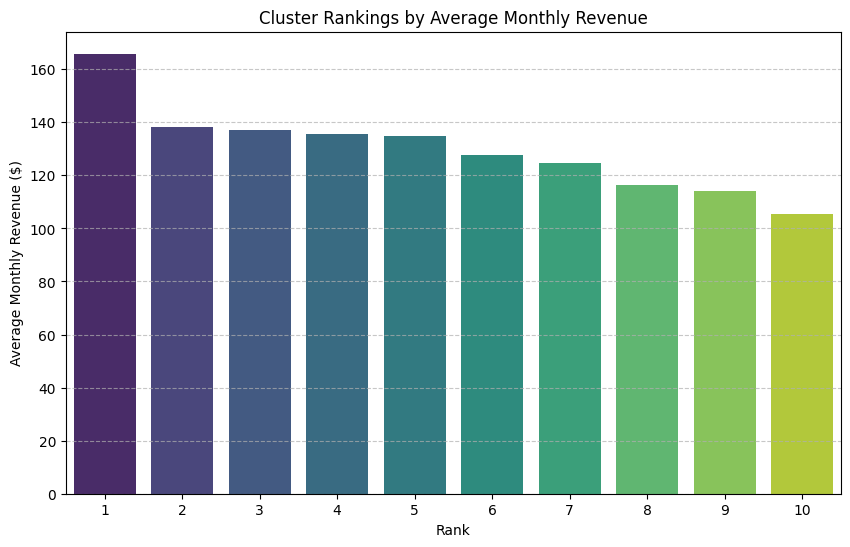

In [47]:
### Revenue distribution by Cluster

# Visualize cluster rankings
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Rank',
    y='average_monthly_revenue',
    data=test_cluster_revenue_ranking,
    palette='viridis'
)
plt.title('Cluster Rankings by Average Monthly Revenue')
plt.xlabel('Rank')
plt.ylabel('Average Monthly Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [48]:
ls '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/'

base_model_v0.0.ipynb  kmeans.pkl                               scaler.pkl
base_model_v0.1.ipynb  Review_Score_Prediction_Modelling.ipynb


### Saving the model for recommendation system application

In [49]:
import joblib

# Save the KMeans model
kmeans_file = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/kmeans.pkl'
joblib.dump(kmeans, kmeans_file)

print(f"Scaler saved to {scaler_file}")
print(f"KMeans model saved to {kmeans_file}")


Scaler saved to /content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/scaler.pkl
KMeans model saved to /content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/kmeans.pkl


In [50]:
import joblib

# Path to your pickle file
pkl_file_path = '/content/drive/Shareddrives/Data 230_Data Visualization_Group Project/Code/Model/scaler.pkl'

# Load the pickle file
try:
    pkl_content = joblib.load(pkl_file_path)
    print(f"Type of content: {type(pkl_content)}")

    # Check if the content is a dictionary
    if isinstance(pkl_content, dict):
        print("Keys in the pickle file:", list(pkl_content.values()))
    else:
        print("Content of the pickle file:", pkl_content)

except Exception as e:
    print(f"Error reading the pickle file: {e}")


Type of content: <class 'dict'>
Keys in the pickle file: [StandardScaler(), ['host_listings_count', 'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'reviews_per_month', 'year_round_occupancy_rate', 'month_round_occupancy_rate', 'revenue_per_rental', 'monthly_revenue_per_rental', 'host_is_superhost_Not Superhost', 'host_is_superhost_Superhost']]
